# 将文本数据表示为词袋

用于机器学习的文本表示有一种最简单的方法，也是最有效且最常用的方法，就是使用**词袋**(bag-of-words)表示。使用这种表示方式时，我们舍弃了输人文本中的大部分结构，如章节、段落、句子和格式，只计算语料库中**每个单词在每个文本中的出现频次**。舍弃结构并仅计算单词出现次数，这会让脑海中出现将文本表示为“袋”的画面。

对于文档语料库，计算词袋表示包括以下三个步骤：   
（1）分词。将每个文档划分为出现在其中的单词[称为词例 (token)]，比如按空格和标点划分。    
（2）构建词表。收集一个词表，里面包含出现在任意文档中的所有词并对它们进行编号(比如按字母顺序排序)。    
（3）编码。对于每个文档，计算词表中每个单词在该文档中的出现频次。     


下图展示了对字符串“This ishow you get ants."的处理过程。其输出是包含每个文档中单词计数的一个向量。对于词表中的每个单词，我们都有它在每个文档中的出现次数。也就是说，整个数据集中的每个唯一单词都对应于这种数值表示的一个特征。请注意，原始字符串中的单词顺序与词袋特征表示完全无关。

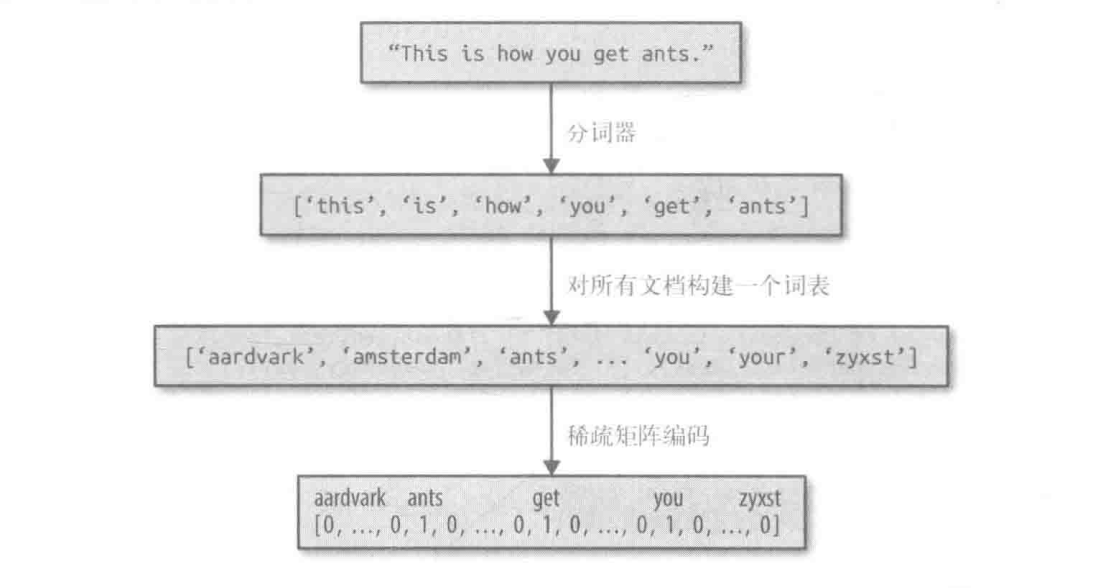

## 1. 将词袋应用于玩具数据集

词袋表示是在CountVectorizer 中实现的，它是一个变换器 (transformer)。我们首先将它应用于一个包含两个样本的玩具数据集，来看一下它的工作原理:

In [1]:
bards_words = ["The fool doth think he is wise", "but the wise man knows himself to be a fool"]

导入 CountVectorizer 并将其实例化，然后对玩具数据进行拟合

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

拟合CountVectorizer 包括训练数据的分词与词表的构建，我们可以通过 vocabulary_属性来访间词表:

In [3]:
print("vocabulary size: {}".format(len(vect.vocabulary_)))
print("vocabulary content: {}".format(vect.vocabulary_))

vocabulary size: 13
vocabulary content: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


词表共包含13个词，从"be" 到 "wise"，可以调用 transform 方法来创建训练数据的词袋表示

In [4]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))  # repr() 函数将对象转化为供解释器读取的形式。

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


词袋表示保存在一个SciPy 稀疏矩阵中，这种数据格式只保存非零元素 。这个矩阵的形状为2 x 13，每行对应于两个数据点之一，每个特征对应于词表中的一个单词。这里使用稀疏矩阵，是因为大多数文档都只包含词表中的一小部分单词，也就是说，特征数组中的大部分元素都为0。想想看，与所有英语单词(这是词表的建模对象) 相比，一篇电影评论中可能出现多少个不同的单词。保存所有0的代价很高，也浪费内存。要想查看稀疏矩阵的实际内容，可以使用 toarray 方法将其转换为“密集的” NumPy 数组(保存所有0元素):

In [5]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


可以看到，每个单词的计数都是0或1。bards_words 中的两个字符串都没有包含相同的单词。来看一下如何阅读这些特征向量。第一个字符串 ("The fool doth think heis wise,")被表示为第一行，对于词表中的第一个单词“be"，出现0次。对于词表中的第二个单词“but"，出现0次。对于词表中的第三个单词“doth"，出现1次，以此类推。通过观察这两行可以看出，第4个单词“fool"、第10个单词“the"与第13 个单词“wise”同时出现在两个字符串中。

## 2. 将词袋应用于电影评论

下面我们将其应用于电影评论情感分析的任务

In [6]:
from sklearn.datasets import load_files
import numpy as np
reviews_train = load_files("E:/clone/machine-learning/data/aclImdb/train/")
# load_files返回一个Bunch对象，其中包含训练文本和训练标签

data_array = np.array(reviews_train.data)
target_array = np.array(reviews_train.target)

# Filter out documents where the target is not equal to 2
labeled_indices = np.where(target_array != 2)[0]
text_train, y_train = data_array[labeled_indices], target_array[labeled_indices]
text_train = [doc.replace(b'<br />',b' ') for doc in text_train]

reviews_test = load_files("E:/clone/machine-learning/data/aclImdb/test/")
data_array = np.array(reviews_test.data)
target_array = np.array(reviews_test.target)
text_test, y_test = data_array, target_array
text_test = [doc.replace(b'<br />',b' ') for doc in text_test]

In [7]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


X_train 是训练数据的词袋表示，其形状为 25000 x 74849，这表示词表中包含 74849个元素。数据同样被保存为 SciPy 稀疏矩阵。我们来更详细地看一下这个词表。访问词表的另一种方法是使用向量器(vectorizer)的get _feature_name 方法，它将返回一个列表，每个元素对应于一个特征:

In [8]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n{}\n".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}\n".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849

First 20 features:
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']

Features 20010 to 20030:
['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']

Every 2000th feature:
['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


如你所见，词表的前10个元素都是数字，这可能有些出人意料。所有这些数字都出现在评论中的某处，因此被提取为单词。大部分数字都没有一目了然的语义，除了“007”，在电影的特定语境中它可能指的是詹姆斯·邦德 (James Bond) 这个角色。从无意义的“单词”中挑出有意义的有时很困难。进一步观察这个词表，我们发现许多以“dra”开头的英语单词。你可能注意到了对于"draught"、"drawback”和“drawer"，其单数和复数形式都包含在词表中，并且作为不同的单词。这些单词具有密切相关的语义，将它们作为不同的单词进行计数(对应于不同的特征)可能不太合适。

在尝试改进特征提取之前，我们先通过实际构建一个分类器来得到性能的量化度量。我们将训练标签保存在y_train 中，训练数据的词袋表示保存在 X_train 中，因此我们可以在这个数据上训练一个分类器。对于这样的高维稀疏数据，类似 LogisticRegression 的线性模型通常效果最好。

首先使用交叉验证对 LogisticRegression 进行评估

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("Mean cross-validation accuary: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuary: 0.882


我们得到的交叉验证平均分数是 88.2%，这对于平衡的二分类任务来说是一个合理的性能我们知道，LogisticRegression 有一个正则化参数C，我们可以通过交叉验证来调节它:

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:

Best cross-validation score: 0.888
Best parameters:  {'C': 0.1}


我们使用C=0.1得到的交又验证分数是 0.888。现在，我们可以在测试集上评估这个参数设置的泛化性能:

In [11]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.06


下面我们来看一下能否改进单词提取。CountVectorizer 使用正则表达式提取词例。默认使用的正则表达式是“b\w\w+\b"。如果你不熟悉正则表达式，它的含义是找到所有包含至少两个字母或数字 (w) 且被词边界 (\b)分隔的字符序列。它不会匹配只有一个字母的单词，还会将类似"doesn't"或"bit.ly"之类的缩写分开，但它会将"h8ter"匹配为个单词。然后，CountVectorizer 将所有单词转换为小写字母，这样"soon""Soon"和"sOon"都对应于同一个词例 (因此也对应于同一个特征)。这一简单机制在实践中的效果很好，但正如前面所见，我们得到了许多不包含信息量的特征(比如数宇)。减少这种特征的一种方法是，仅使用至少在 2个文档(或者至少5个，等等) 中出现过的词例。仅在一个文档中出现的词例不大可能出现在测试集中，因此没什么用。我们可以用min_df 参数来设置词例至少需要在多少个文档中出现过:

In [12]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


通过要求每个词例至少在5个文档中出现过，我们可以将特征数量减少到 27271 个，正如上面的输出所示一只有原始特征的三分之一左右。我们再来查看一些词例:

In [13]:
feature_names = vect.get_feature_names_out()

print("First 50 features:\n{}\n".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}\n".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']

Features 20010 to 20030:
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']

Every 700th feature:
['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting' 

数字的个数明显变少了，有些生僻词或拼写错误似乎也都消失了。我们再次运行网格搜索来看一下模型的性能如何:

In [14]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:

Best cross-validation score: 0.887


网格搜索的最佳验证精度0.887，这和前面一样。我们并没有改进模型，但减少要处理的特征数量可以加速处理过程，舍弃无用的特征也可能提高模型的可解释性。